In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

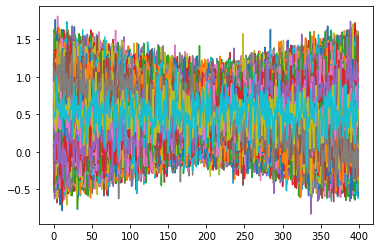

In [60]:
N = 400
num_samples = 2000
x_train = []
labels = []
for i in range(num_samples):
    a = np.random.randint(0, 3)
    noise = np.random.normal(loc = 0, scale = 0.2, size = N)
    
    
    
    if(a == 1):
        #no trend
        sample = np.ones(N)*0.5 + noise
    elif(a == 2):
        #uptrend
        sample = np.linspace(0, 1, N) + noise
    else:
        #downtrend
        sample = np.linspace(1, 0, N) + noise
        
    label = np.array([0, 0, 0])
    label[a] = 1
    plt.plot(sample)
    x_train.append((sample-np.average(sample))/(max(sample) - min(sample)))
    labels.append(label)
x_train = np.array(x_train)
labels = np.array(labels)

In [61]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(N,activation='relu'))
model.add(tf.keras.layers.Dense(int(N/2)))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer =tf.keras.optimizers.Adam(lr = 0.0001, beta_1 = 0.95), loss = 'categorical_crossentropy')

batch_size = 10
model.fit(x_train,labels, epochs =20, batch_size = batch_size, validation_data = None, verbose = 1)

Epoch 1/20
200/200 [==============================] - 1s 1ms/step - loss: 0.4738
Epoch 2/20
200/200 [==============================] - 0s 1ms/step - loss: 0.0338
Epoch 3/20
200/200 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 4/20
200/200 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 5/20
200/200 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 6/20
200/200 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 7/20
200/200 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8/20
200/200 [==============================] - 0s 1ms/step - loss: 8.4964e-04
Epoch 9/20
200/200 [==============================] - 0s 1ms/step - loss: 6.3128e-04
Epoch 10/20
200/200 [==============================] - 0s 1ms/step - loss: 4.7278e-04
Epoch 11/20
200/200 [==============================] - 0s 1ms/step - loss: 3.9375e-04
Epoch 12/20
200/200 [==============================] - 0s 1ms/step - loss: 3.1543e-04
Epoch

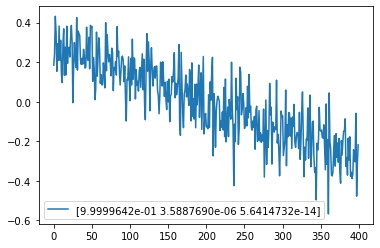

In [62]:
x_pred = model.predict(np.atleast_2d(x_train[0]))



i = 0
plt.plot(x_train[i], label = str(x_pred[i]))
plt.legend()

,timestamp,ftr_vector
0,1.607814e+09,16.8
1,1.607814e+09,16.8
2,1.607814e+09,16.8
3,1.607815e+09,16.9
4,1.607816e+09,17.0
...,...,...
8534,1.615760e+09,17.1
8535,1.615761e+09,17.4
8536,1.615761e+09,17.4
8537,1.615762e+09,17.5


8440


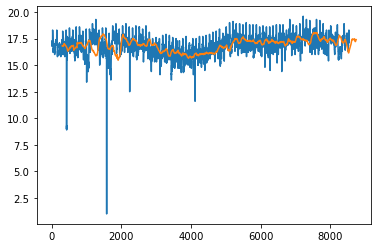

In [71]:
#df = pd.read_csv("../data/consumer/conductivity_data.csv")

#display(df)
#vals = df["Value"].values[::40]

df = pd.read_csv("../data/consumer/braila_pressure5770.csv")

display(df)
vals = df["ftr_vector"].values

#vals = np.append(vals, (6000 + (np.random.rand(1000)-0.5)*1000))

plt.plot(vals)

values = np.convolve(vals, np.ones(100)/100, mode='valid')

print(len(values))



plt.plot(range(300, len(values) + 300),values)
topredict = []
amplitudes = []
for i in range(N, len(values)):
    sample = np.array(values[i-N:i])
    amplitudes.append(np.abs(max(sample) - min(sample)))
    topredict.append((sample - np.average(sample))/(max(sample) - min(sample)))
    
topredict = np.array(topredict)

x_pred = np.argmax(model.predict(np.atleast_2d(topredict)), axis = 1)


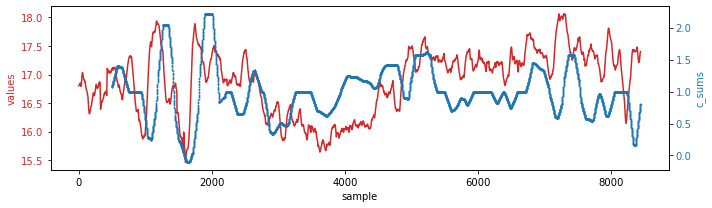

In [73]:
fig, ax1 = plt.subplots(figsize = (10, 3))
color = 'tab:red'
ax1.set_xlabel('sample')
#ax1.set_ylim([0, 12000])
ax1.set_ylabel('values', color=color)
ax1.plot(values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

conv_window = 100
toplot = np.convolve(x_pred, np.ones(conv_window)/conv_window, mode='valid')
amplitude = np.convolve(amplitudes, np.ones(conv_window)/conv_window, mode='valid')/2

color = 'tab:blue'
ax2.set_ylabel('c_sums', color=color)  
ax2.scatter(range(len(values)-len(toplot),len(values)), 1 + (toplot-1)*amplitude, color=color, s = 0.5)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim([0, 2])
fig.tight_layout()  
plt.show()

# 0 - no trend
# 1 - uptrend
# 2 - downtrend

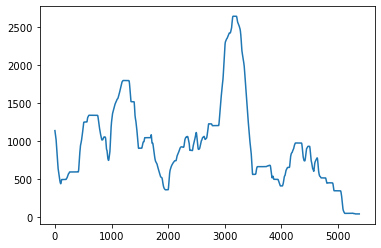

In [24]:
plt.plot(amplitude)

In [8]:
print(len([]))

0
